e:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)

neighbors: 3
test set acctual target: [1 0 1 0 1 1 0]
test set predictions:    [1 0 1 0 1 0 0]
train set accuracy: 0.95
test set accuracy:  0.86
=== END ===


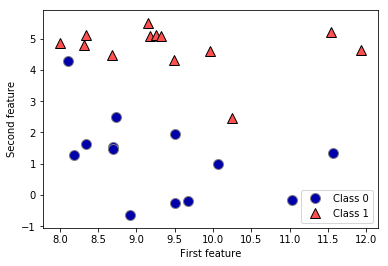

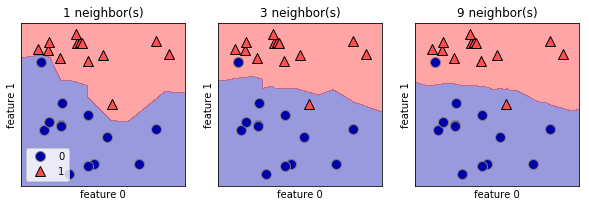

In [15]:
# forge
%matplotlib inline

from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')

print('X.shape: {}'.format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors = n_neighbors)

clf.fit(X_train, y_train)

print('\nneighbors: {}'.format(n_neighbors))
print('test set acctual target: {}'.format(y_test))
print('test set predictions:    {}'.format(clf.predict(X_test)))

print('train set accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test set accuracy:  {:.2f}'.format(clf.score(X_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=3)
print('=== END ===')

## k-neighbors Classifier: n_neighbors 对决策边界的影响

cancer dataset keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

target names: ['malignant' 'benign']

cancer data shape: (569, 30)
cancer data:
[[  17.99    10.38   122.8   1001.       0.118    0.278    0.3      0.147
     0.242    0.079    1.095    0.905    8.589  153.4      0.006    0.049
     0.054    0.016    0.03     0.006   25.38    17.33   184.6   2019.
     0.162    0.666    0.712    0.26

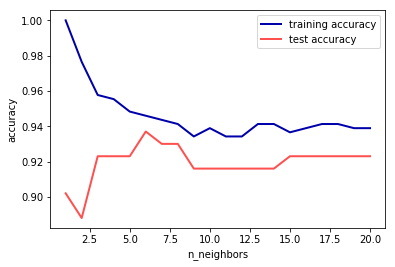

In [8]:
# breast cancer
%matplotlib inline

from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print('cancer dataset keys: {}'.format(cancer.keys()))
print('\nfeature names:\n{}'.format(cancer.feature_names))
print('\ntarget names: {}'.format(cancer.target_names))

print('\ncancer data shape: {}'.format(cancer.data.shape))
print('cancer data:\n{}'.format(cancer.data[:3]))
print('\ntarget:\n{}'.format(cancer.target))

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1, 21)
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label='training accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

print('=== END ===')

## k-neighbors Classifier：n-neighbors对训练集和测试集的预测准确度的曲线

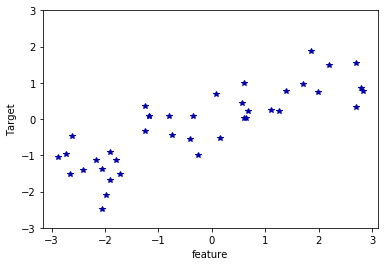

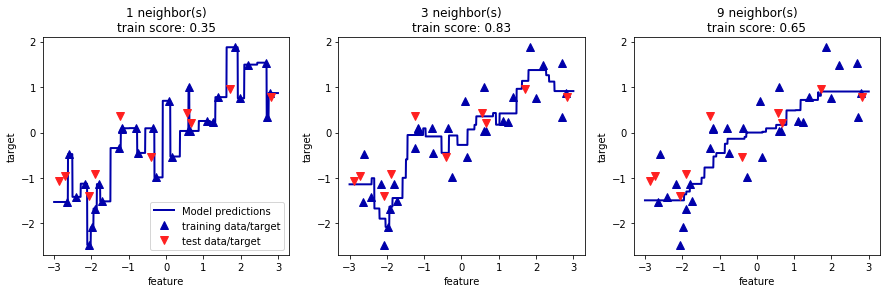

Linear regression
lr.coef_: [0.524]
lr.intercept_: -0.09394309015377247
Training set score: 0.69
Test set score: 0.63
=== END ===


In [5]:
# wave
#%matplotlib notebook
%matplotlib inline

from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, '*')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('Target')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# k-neighbor regression
fig, axes = plt.subplots(1, 3, figsize=(15,4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize = 8)
    
    ax.set_title('{} neighbor(s)\ntrain score: {:.2f}'.format(n_neighbors, reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')

axes[0].legend(['Model predictions', 'training data/target', 'test data/target'], loc='best')
plt.show()

# linear regression
lr = LinearRegression().fit(X_train, y_train)
print('Linear regression')
print('lr.coef_: {}'.format(lr.coef_))    # one dimension dataset i.e one feature only, coef_ has only 1 value
print('lr.intercept_: {}'.format(lr.intercept_))
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

print('=== END ===')


## k-neighbor Classifier: n_neighbors vs training score
## linear regression exercise

Boston Housing data(extended)
X shape: (506, 104), y shape: (506,)

Linear regression model
lr.coef_: (shape: (104,))
[ -402.752   -50.071  -133.317   -12.002   -12.711    28.305    54.492
   -51.734    25.26     36.499   -10.104   -19.629   -21.368    14.647
  2895.054  1510.269   117.995   -26.566    31.249   -31.446    45.254
  1283.496 -2246.003   222.199    -0.466    40.766   -13.436   -19.096
    -2.776   -80.971     9.731     5.133    -0.788    -7.603    33.672
   -11.505    66.267   -17.563    42.983     1.277     0.61     57.187
    14.082    55.34    -30.348    18.812   -13.777    60.979   -12.579
   -12.002   -17.698   -34.028     7.15     -8.41     16.986   -12.941
   -11.806    57.133   -17.581     1.696    27.218   -16.745    75.03
   -30.272    47.78    -40.541     5.504    21.531    25.366   -49.485
    28.109    10.469   -71.559   -23.74      9.574    -3.788     1.214
    -4.72     41.238   -37.702    -2.156   -26.296   -33.202    45.932
   -23.014   -17.515   -14.085 

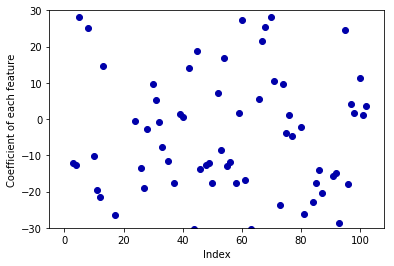


=== Ridge regression model ===

alpha: 10
Training set score: 0.79
Test set score: 0.64


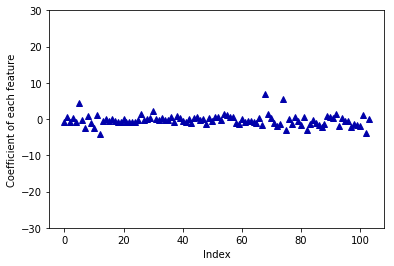

alpha: 1.0 (default)
Training set score: 0.89
Test set score: 0.75


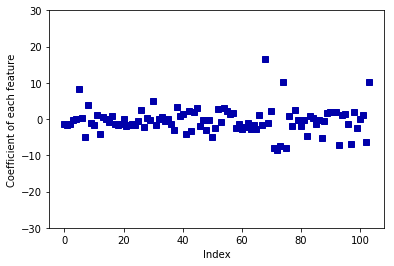

alpha: 0.1
Training set score: 0.93
Test set score: 0.77


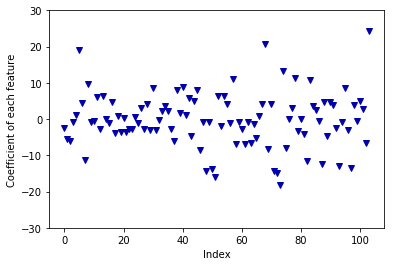

In [28]:
# Boston housing
%matplotlib inline

from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

X, y = mglearn.datasets.load_extended_boston()
print('Boston Housing data(extended)')
print('X shape: {}, y shape: {}'.format(X.shape, y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('\nLinear regression model')
lr = LinearRegression().fit(X_train, y_train)
# as 104 dimensions(features), coef_ has 104 values, 1 per feature
print('lr.coef_: (shape: {})\n{}'.format(lr.coef_.shape, lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))
# view of co_ef
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Index')
plt.ylabel('Coefficient of each feature')
plt.ylim(-30, 30)
plt.show()

print('\n=== Ridge regression model ===\n')

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('alpha: 10')
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))
# view of co_ef
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.xlabel('Index')
plt.ylabel('Coefficient of each feature')
plt.ylim(-30, 30)
plt.show()

ridge1 = Ridge().fit(X_train, y_train)
print('alpha: 1.0 (default)')
print('Training set score: {:.2f}'.format(ridge1.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge1.score(X_test, y_test)))
# view of co_ef
plt.plot(ridge1.coef_, 's', label='Ridge alpha=1.0')
plt.xlabel('Index')
plt.ylabel('Coefficient of each feature')
plt.ylim(-30, 30)
plt.show()

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('alpha: 0.1')
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))
# view of co_ef
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.xlabel('Index')
plt.ylabel('Coefficient of each feature')
plt.ylim(-30, 30)
plt.show()


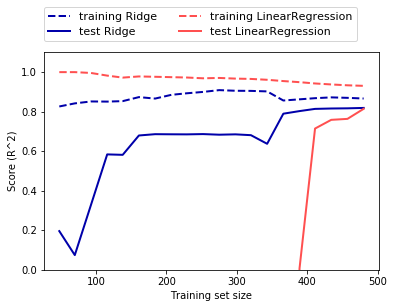

In [29]:
mglearn.plots.plot_ridge_n_samples()

## Linear regression and Ridge regression exercise

e:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


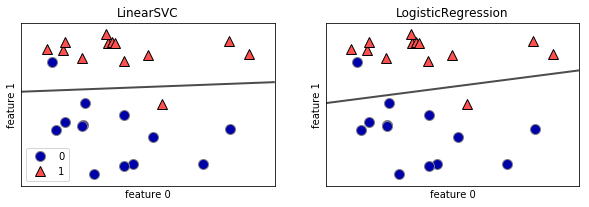

In [36]:
# forge, linear classifier models
%matplotlib inline

from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend()
plt.show()


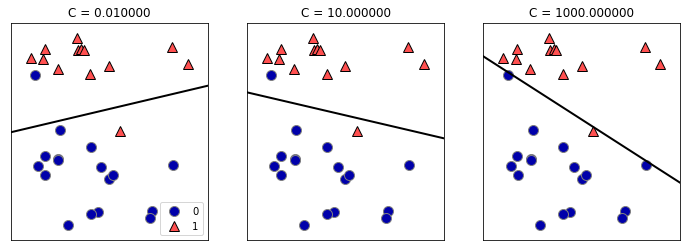

In [37]:
mglearn.plots.plot_linear_svc_regularization()

breast cancer dataset, LogisticRegression linear clssifier model

C = 0.001
Training set score: 0.923
Test set score: 0.937

C = 0.01
Training set score: 0.934
Test set score: 0.930

C = 0.1
Training set score: 0.944
Test set score: 0.944

C = 1
Training set score: 0.955
Test set score: 0.958

C = 10
Training set score: 0.969
Test set score: 0.965

C = 100
Training set score: 0.972
Test set score: 0.965

C = 1000
Training set score: 0.984
Test set score: 0.979



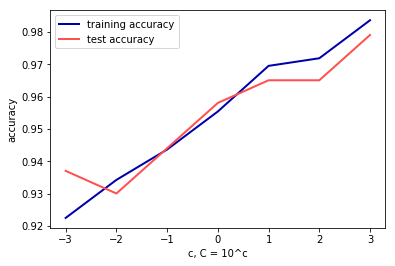

In [54]:
# breast cancer dataset, logisticregression classifier model
%matplotlib inline

from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

print('breast cancer dataset, LogisticRegression linear clssifier model\n')
'''
C = 1.0
logreg = LogisticRegression(C=C).fit(X_train, y_train)
print('C = {}'.format(C))
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))
'''

training_accuracy = []
test_accuracy = []

c_setting = range(-3, 4)
for c in c_setting:
    logreg = LogisticRegression(C=10**c).fit(X_train, y_train)
    training_accuracy.append(logreg.score(X_train, y_train))
    test_accuracy.append(logreg.score(X_test, y_test))

for c, training_score, test_score in zip(c_setting, training_accuracy, test_accuracy):
    print('C = {}'.format(10**c))
    print('Training set score: {:.3f}'.format(training_score))
    print('Test set score: {:.3f}\n'.format(test_score))
    
plt.plot(c_setting, training_accuracy, label='training accuracy')
plt.plot(c_setting, test_accuracy, label='test accuracy')
plt.xlabel('c, C = 10^c')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Accuracy on train set: 0.977
Accuracy on test set: 0.944


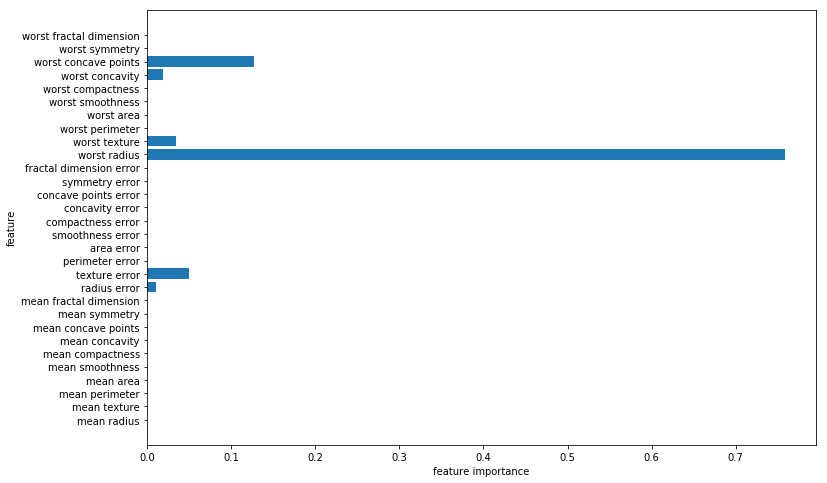

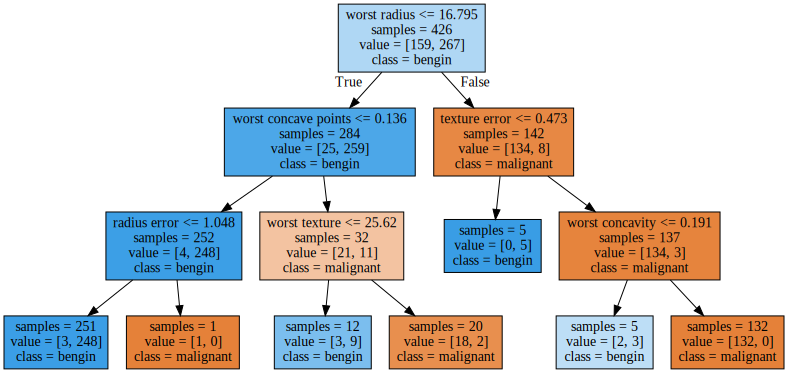

In [2]:
%matplotlib inline

import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz

cancer = load_breast_cancer()
n_features = cancer.data.shape[1]

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on train set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

plt.rcParams['figure.figsize'] = [12,8]

plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'bengin'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

X shape: (100, 2), number of features: 2


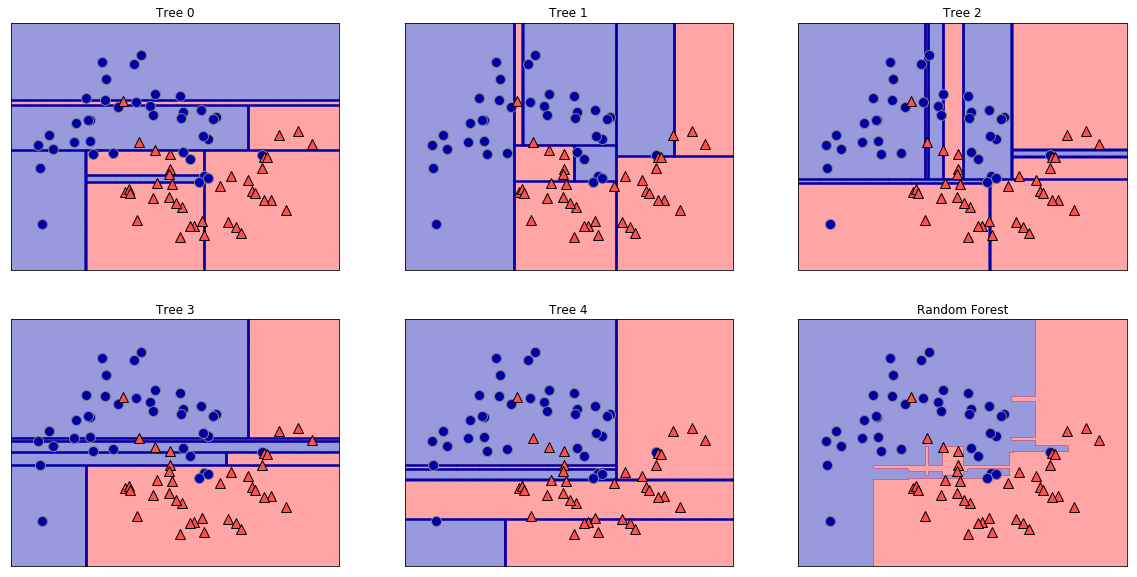

In [75]:
%matplotlib inline

from preamble import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 100, noise=0.25, random_state=3)
print('X shape: {}, number of features: {}'.format(X.shape, X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


# RandomForestClassifier: 
# n_estimators - number of trees, 
# max_features by default is 'auto' i.e.sqrt(n_features)
forest = RFC(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=axes[-1,-1])
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)

Accuracy on train set: 1.000
Accuracy on test set: 0.958


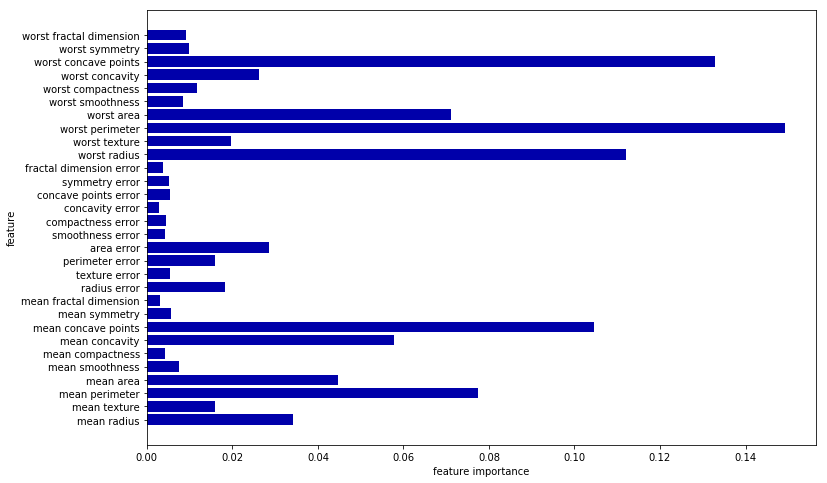

In [76]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
n_features = cancer.data.shape[1]

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print('Accuracy on train set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

plt.rcParams['figure.figsize'] = [12,8]

plt.barh(range(n_features), forest.feature_importances_)
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()